In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from scipy import ndimage
import math
from feature_based_segmentation import *

ImportError: DLL load failed: The specified module could not be found.

In [2]:
def importPictures(name):
    if name=='A':
        img_train = cv2.imread('Ex3_data_code/data/train_A_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_background = cv2.imread('Ex3_data_code/data/test_A_background.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_foreground = cv2.imread('Ex3_data_code/data/test_A_foreground.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_comb = cv2.imread('Ex3_data_code/data/test_A_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_truth = cv2.imread('Ex3_data_code/data/test_A_ground_truth.png', cv2.IMREAD_GRAYSCALE).astype(float)
    elif name=='B':
        img_train = cv2.imread('Ex3_data_code/data/train_B_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_background = cv2.imread('Ex3_data_code/data/test_B_background.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_foreground = cv2.imread('Ex3_data_code/data/test_B_foreground.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_comb = cv2.imread('Ex3_data_code/data/test_B_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_truth = cv2.imread('Ex3_data_code/data/test_B_ground_truth.png', cv2.IMREAD_GRAYSCALE).astype(float)
    elif name=='C':
        img_train = cv2.imread('Ex3_data_code/data/train_C_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_background = cv2.imread('Ex3_data_code/data/test_C_background.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_foreground = cv2.imread('Ex3_data_code/data/test_C_foreground.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_comb = cv2.imread('Ex3_data_code/data/test_C_image.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_truth = cv2.imread('Ex3_data_code/data/test_C_ground_truth.png', cv2.IMREAD_GRAYSCALE).astype(float)
    elif name=='bone':
        img_train = cv2.imread('Ex3_data_code/data/bone_train.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_comb = cv2.imread('Ex3_data_code/data/bone_test.png', cv2.IMREAD_GRAYSCALE).astype(float)
        img_test_truth = cv2.imread('Ex3_data_code/data/bone_label.png', cv2.IMREAD_GRAYSCALE).astype(float)
        dici = {'train': img_train,
                'test1': img_test_comb,
                'true': img_test_truth}
    if name!='bone':
        dici = {'train': img_train,
                'test1': img_test_background,
                'test2': img_test_foreground,
                'test3': img_test_comb,
                'true': img_test_truth}
    return dici

Now featureextraction is performed on all images:

In [3]:
# Feature extraction is made for all images:
def featureDict(dic):
    feature_dict = {}
    for i in dic:
        if i != 'true':
            im = get_gauss_feat_im(dic[i], 2.5)
            dim = im.shape
            feature_dict[i] = np.reshape(im, (dim[0]*dim[1], dim[2]))
        else:
            im = dic[i]
            dim = im.shape
            feature_dict[i] = np.reshape(im, (dim[0]*dim[1]))
    return feature_dict

def patchFeatureDict(dic):
    feature_dict = {}
    for i in dic:
        if i != 'true':
            im = ndim2col(dic[i], [9, 9])
            dim = im.shape
            print(dim)
            feature_dict[i] = np.reshape(im, (dim[0]*dim[1], dim[2]))
        else:
            im = dic[i]
            dim = im.shape
            feature_dict[i] = np.reshape(im, (dim[0]*dim[1]))
    return feature_dict

# Get probability matrix:
def probabilityMatrix(predictions, centers, pic_label):
    probs = np.zeros((centers, 2))
    for i, item in enumerate(predictions):
        if pic_label[i] == 0:
            probs[item][0] += 1
        else:
            probs[item][1] += 1

    for i, item in enumerate(probs):
        probs[i] = item/sum(item)
    return(probs)

# Determines the biggest of two elements
def biggest(lst):
    if lst[0] > lst[1]:
        return 255.0
    else:
        return 0.0

def knnTrainer(feature_dict, subsample=10000, centers=500):
    n, _ = feature_dict['train'].shape

    # subsampling:
    idx = np.random.permutation(np.arange(n))[:subsample]
    pic_subsample = np.take(feature_dict['train'], idx, axis=0)
    pic_label = np.take(feature_dict['true'], idx, axis=0)

    # fit model:
    model = sklearn.cluster.KMeans(centers)
    model.fit(pic_subsample)

    # Make predictions from subsample:
    predictions_train = model.predict(pic_subsample)

    # Create probability matrix:
    probs = probabilityMatrix(predictions_train, centers, pic_label)

    return(model, probs)

## Picture A:

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


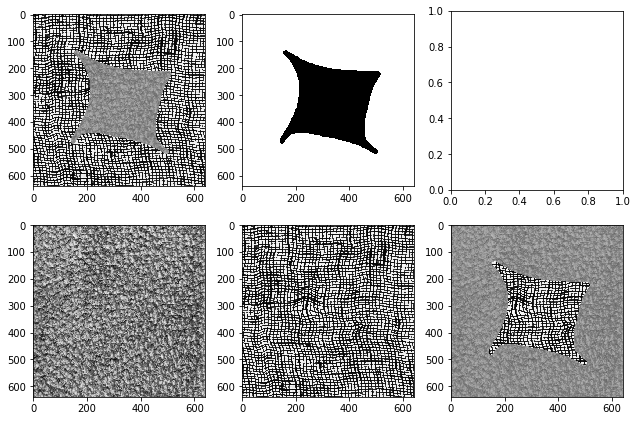

In [4]:
# Import pictures of series A:
dicA = importPictures("A")

fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicA['train'], cmap = "gray")
f1_axes[0,1].imshow(dicA['true'], cmap = "gray")
f1_axes[1,0].imshow(dicA['test1'], cmap = "gray")
f1_axes[1,1].imshow(dicA['test2'], cmap = "gray")
f1_axes[1,2].imshow(dicA['test3'], cmap = "gray")
fig1.show()
fig1.tight_layout()

In [5]:
# Feature extraction of pictures:
feature_dictA = featureDict(dicA)
#feature_dictA_t2 = patchFeatureDict(dicA)

######## Train the model ##############
modelA, probsA = knnTrainer(feature_dictA)

Test the model: We now compute the feature images of a test picture:

In [6]:
predictions_test1 = modelA.predict(feature_dictA['test1'])
predictions_test2 = modelA.predict(feature_dictA['test2'])
predictions_test3 = modelA.predict(feature_dictA['test3'])

In [7]:
prob_img_test1 = np.array(list(map(lambda x: biggest(probsA[x]), predictions_test1))).reshape(640, 640)
prob_img_test2 = np.array(list(map(lambda x: biggest(probsA[x]), predictions_test2))).reshape(640, 640)
prob_img_test3 = np.array(list(map(lambda x: biggest(probsA[x]), predictions_test3))).reshape(640, 640)

# Optional Gaussian filter to the picture:
#prob_img_test1 = scipy.ndimage.gaussian_filter(prob_img_test1, 1, order=0)
#prob_img_test2 = scipy.ndimage.gaussian_filter(prob_img_test2, 1, order=0)
#prob_img_test3 = scipy.ndimage.gaussian_filter(prob_img_test3, 1, order=0)

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


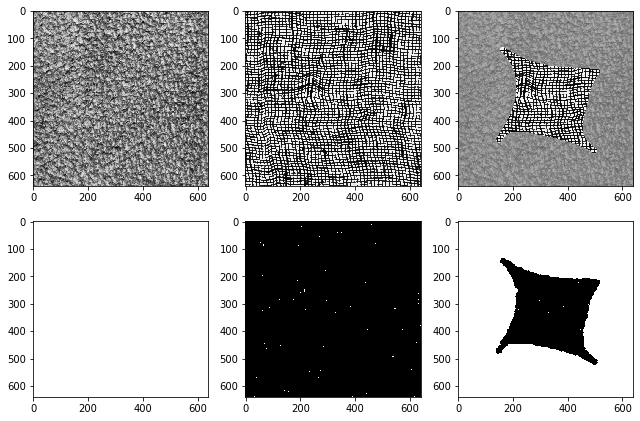

In [8]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicA['test1'], cmap = "gray")
f1_axes[0,1].imshow(dicA['test2'], cmap = "gray")
f1_axes[0,2].imshow(dicA['test3'], cmap = "gray")
f1_axes[1,0].imshow(prob_img_test1 , cmap = "gray")
f1_axes[1,1].imshow(prob_img_test2 , cmap = "gray")
f1_axes[1,2].imshow(prob_img_test3 , cmap = "gray")
fig1.show()
fig1.tight_layout()

## Picture B:

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


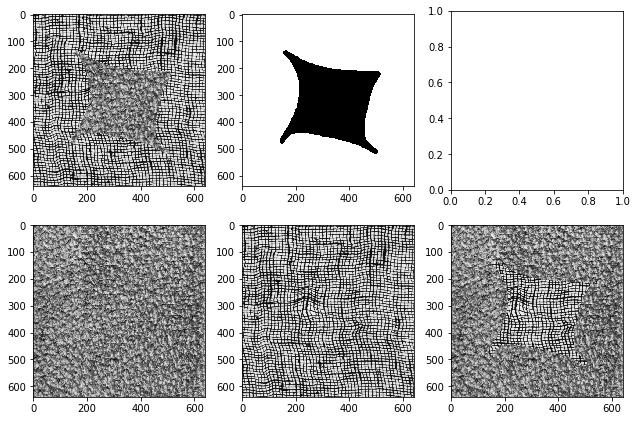

In [10]:
# Import pictures of series B:
dicB = importPictures("B")

fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicB['train'], cmap = "gray")
f1_axes[0,1].imshow(dicB['true'], cmap = "gray")
f1_axes[1,0].imshow(dicB['test1'], cmap = "gray")
f1_axes[1,1].imshow(dicB['test2'], cmap = "gray")
f1_axes[1,2].imshow(dicB['test3'], cmap = "gray")
fig1.show()
fig1.tight_layout()

In [11]:
# Feature extraction of pictures:
feature_dictB = featureDict(dicB)
#feature_dictA_t2 = patchFeatureDict(dicA)

######## Train the model ##############
modelB, probsB = knnTrainer(feature_dictB)

In [13]:
# Predictions on test images:
predictions_test1 = modelB.predict(feature_dictB['test1'])
predictions_test2 = modelB.predict(feature_dictB['test2'])
predictions_test3 = modelB.predict(feature_dictB['test3'])

In [18]:
prob_img_test1 = np.array(list(map(lambda x: biggest(probsB[x]), predictions_test1))).reshape(640, 640)
prob_img_test2 = np.array(list(map(lambda x: biggest(probsB[x]), predictions_test2))).reshape(640, 640)
prob_img_test3 = np.array(list(map(lambda x: biggest(probsB[x]), predictions_test3))).reshape(640, 640)

# Optional Gaussian filter to the picture:
#prob_img_test1 = scipy.ndimage.gaussian_filter(prob_img_test1, 10, order=0)
#prob_img_test2 = scipy.ndimage.gaussian_filter(prob_img_test2, 10, order=0)
#prob_img_test3 = scipy.ndimage.gaussian_filter(prob_img_test3, 10, order=0)

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


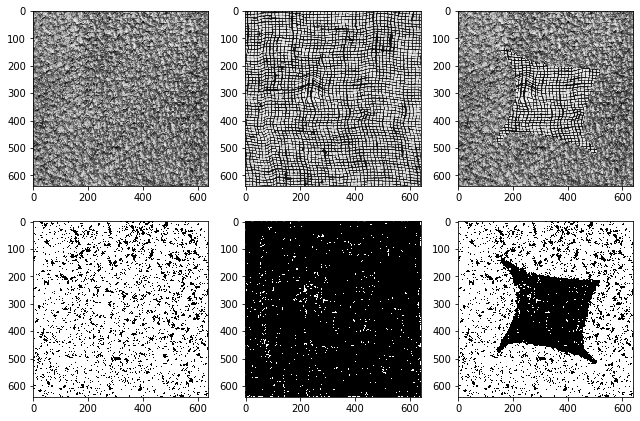

In [19]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicB['test1'], cmap = "gray")
f1_axes[0,1].imshow(dicB['test2'], cmap = "gray")
f1_axes[0,2].imshow(dicB['test3'], cmap = "gray")
f1_axes[1,0].imshow(prob_img_test1 , cmap = "gray")
f1_axes[1,1].imshow(prob_img_test2 , cmap = "gray")
f1_axes[1,2].imshow(prob_img_test3 , cmap = "gray")
fig1.show()
fig1.tight_layout()

## Picture C:

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


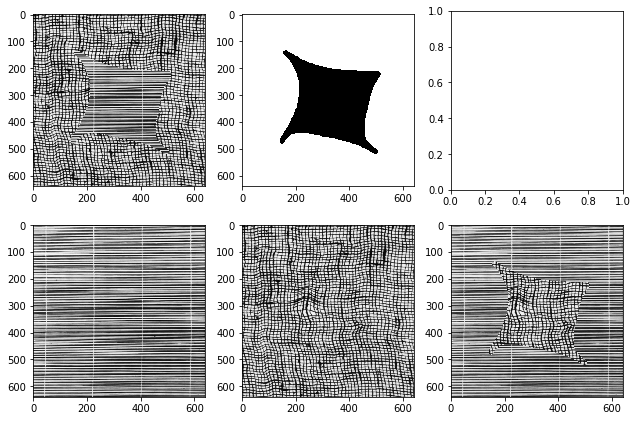

In [21]:
# Import pictures of series C:
dicC = importPictures("C")

fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicC['train'], cmap = "gray")
f1_axes[0,1].imshow(dicC['true'], cmap = "gray")
f1_axes[1,0].imshow(dicC['test1'], cmap = "gray")
f1_axes[1,1].imshow(dicC['test2'], cmap = "gray")
f1_axes[1,2].imshow(dicC['test3'], cmap = "gray")
fig1.show()
fig1.tight_layout()

In [22]:
# Feature extraction of pictures:
feature_dictC = featureDict(dicC)
#feature_dictA_t2 = patchFeatureDict(dicA)

######## Train the model ##############
modelC, probsC = knnTrainer(feature_dictC)

In [24]:
# Predictions on test images:
predictions_test1 = modelC.predict(feature_dictC['test1'])
predictions_test2 = modelC.predict(feature_dictC['test2'])
predictions_test3 = modelC.predict(feature_dictC['test3'])

In [25]:
prob_img_test1 = np.array(list(map(lambda x: biggest(probsC[x]), predictions_test1))).reshape(640, 640)
prob_img_test2 = np.array(list(map(lambda x: biggest(probsC[x]), predictions_test2))).reshape(640, 640)
prob_img_test3 = np.array(list(map(lambda x: biggest(probsC[x]), predictions_test3))).reshape(640, 640)

# Optional Gaussian filter to the picture:
#prob_img_test1 = scipy.ndimage.gaussian_filter(prob_img_test1, 10, order=0)
#prob_img_test2 = scipy.ndimage.gaussian_filter(prob_img_test2, 10, order=0)
#prob_img_test3 = scipy.ndimage.gaussian_filter(prob_img_test3, 10, order=0)

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


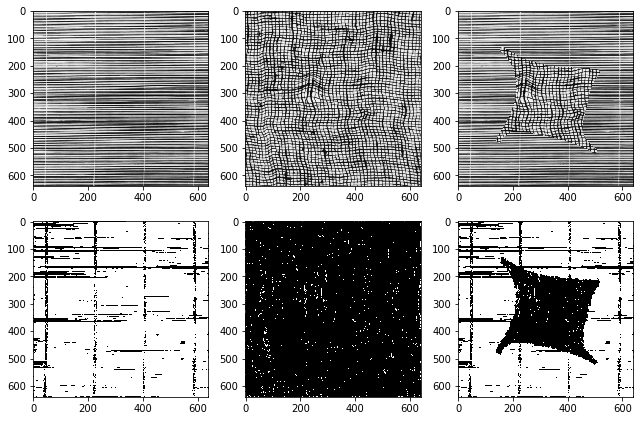

In [26]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0,0].imshow(dicC['test1'], cmap = "gray")
f1_axes[0,1].imshow(dicC['test2'], cmap = "gray")
f1_axes[0,2].imshow(dicC['test3'], cmap = "gray")
f1_axes[1,0].imshow(prob_img_test1 , cmap = "gray")
f1_axes[1,1].imshow(prob_img_test2 , cmap = "gray")
f1_axes[1,2].imshow(prob_img_test3 , cmap = "gray")
fig1.show()
fig1.tight_layout()

## Bone:

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


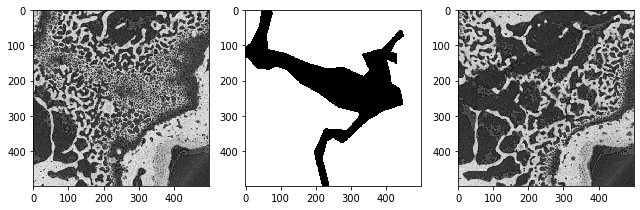

In [27]:
# Import pictures of series 'bone':
dicBone = importPictures("bone")

fig1, f1_axes = plt.subplots(ncols=3, nrows=1, constrained_layout=False, figsize=(9,6))
f1_axes[0].imshow(dicBone['train'], cmap = "gray")
f1_axes[1].imshow(dicBone['true'], cmap = "gray")
f1_axes[2].imshow(dicBone['test1'], cmap = "gray")

fig1.show()
fig1.tight_layout()

In [28]:
# Feature extraction of pictures:
feature_dictBone = featureDict(dicBone)
#feature_dictA_t2 = patchFeatureDict(dicA)

######## Train the model ##############
modelBone, probsBone = knnTrainer(feature_dictBone)

In [31]:
width, height = dicBone['train'].shape
# Predictions on test images:
predictions_test = modelBone.predict(feature_dictBone['test1'])
# Probability image:
prob_img_test = np.array(list(map(lambda x: biggest(probsBone[x]), predictions_test))).reshape(width, height)
# Optional Gaussian filter to the picture:
#prob_img_test = scipy.ndimage.gaussian_filter(prob_img_test1, 10, order=0)

C:\Users\aabil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


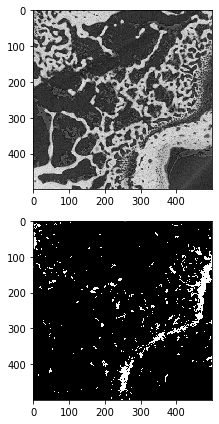

In [33]:
fig1, f1_axes = plt.subplots(ncols=1, nrows=2, constrained_layout=False, figsize=(9,6))
f1_axes[0].imshow(dicBone['test1'], cmap = "gray")
f1_axes[1].imshow(prob_img_test , cmap = "gray")
fig1.show()
fig1.tight_layout()